출처 : https://github.com/pedropro/TACO

출처 : https://github.com/wimlds-trojmiasto/detect-waste

출처 : https://github.com/Youngpyoryu/TACO.git

In [1]:
!git clone https://github.com/Youngpyoryu/TACO.git

Cloning into 'TACO'...
remote: Enumerating objects: 474, done.
remote: Counting objects: 100% (204/204), done.
remote: Compressing objects: 100% (136/136), done.
remote: Total 474 (delta 146), reused 118 (delta 68), pack-reused 270
Receiving objects: 100% (474/474), 67.84 MiB | 11.44 MiB/s, done.
Resolving deltas: 100% (297/297), done.


In [2]:
!pip3 install -r /content/TACO/requirements.txt

In [3]:
!python /content/TACO/download.py

Note. If for any reason the connection is broken. Just call me again and I will start where I left.
Finished


In [4]:
!git clone https://github.com/Youngpyoryu/detect-waste.git

Cloning into 'detect-waste'...
remote: Enumerating objects: 928, done.
remote: Counting objects: 100% (162/162), done.
remote: Compressing objects: 100% (126/126), done.
remote: Total 928 (delta 71), reused 80 (delta 36), pack-reused 766
Receiving objects: 100% (928/928), 85.18 MiB | 6.42 MiB/s, done.
Resolving deltas: 100% (437/437), done.


In [5]:
!pip install funcy
!pip install iterative-stratification==0.1.6

In [6]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataset_path = '/content/TACO/data'
anns_file_path = dataset_path + '/' + 'annotations.json'

# json 파일을 읽어준다.
with open(anns_file_path,'r') as f:
  dataset = json.loads(f.read())

# json의 키를 이용하여 value값을 저장
categories = dataset['categories']
anns = dataset['annotations']
imgs = dataset['images']

# 각 갯수를 저장한다.
nr_cats = len(categories)
nr_annotations = len(anns)
nr_images = len(imgs)

cat_names = []
super_cat_names = []
super_cat_ids = {}
super_cat_last_name = ''
nr_super_cats = 0

for cat_it in categories:
  cat_names.append(cat_it['name'])
  super_cat_name = cat_it['supercategory']

  if super_cat_name != super_cat_last_name:
    super_cat_names.append(super_cat_name)
    super_cat_ids[super_cat_name] = nr_super_cats
    super_cat_last_name = super_cat_name
    nr_super_cats += 1

print('Number of super categories:', nr_super_cats)
print('Number of categories:', nr_cats)
print('Number of annotations:', nr_annotations)
print('Number of images:', nr_images)

Number of super categories: 28
Number of categories: 60
Number of annotations: 4784
Number of images: 1500


In [7]:
!python /content/TACO/detector/config.py

In [8]:
!python3 /content/TACO/detector/split_dataset.py --dataset_dir '/content/TACO/data'

In [31]:
!python3 /content/TACO/detector/utils.py

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

In [10]:
# model.py에서 에러가 뜨는 부분은 'import keras.engine as KE'의 keras의 버전 오류이기 때문에 변경해준다.
!pip install tensorflow==1.13.1
!pip install keras==2.0.8
!pip install h5py==2.10.0

     |████████████████████████████████| 92.6 MB 29 kB/s 
     |████████████████████████████████| 3.2 MB 53.3 MB/s 
     |████████████████████████████████| 367 kB 74.9 MB/s 
     |████████████████████████████████| 50 kB 8.7 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.6.0
    Uninstalling tensorflow-estimator-2.6.0:
      Successfully uninstalled tensorflow-estimator-2.6.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.6.0
    Uninstalling tensorboard-2.6.0:
      Successfully uninstalled tensorboard-2.6.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.6.0
    Uninstalling tensorflow-2.6.0:
      Successfully uninstalled tensorflow-2.6.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
kapre 0.3.5 requires tensorflow>=2.0.0, but you 

In [11]:
!python3 /content/TACO/detector/model.py

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

In [20]:
# 이 부분 또한 parse를 사용하여 선택지에 맞는 정답을 주어야 한다. 이 부분은 내일 하도록 하자~
!python /content/TACO/detector/detector.py --model '/content/TACO/data' --dataset '/content/TACO/data' --class_map 0 --round 1 <command>

/bin/bash: -c: line 0: syntax error near unexpected token `newline'
/bin/bash: -c: line 0: `python /content/TACO/detector/detector.py --model '/content/TACO/data' --dataset '/content/TACO/data' --class_map 0 --round 1 <command>'


1. Dataset statistics

This shows the number of annotations per category;

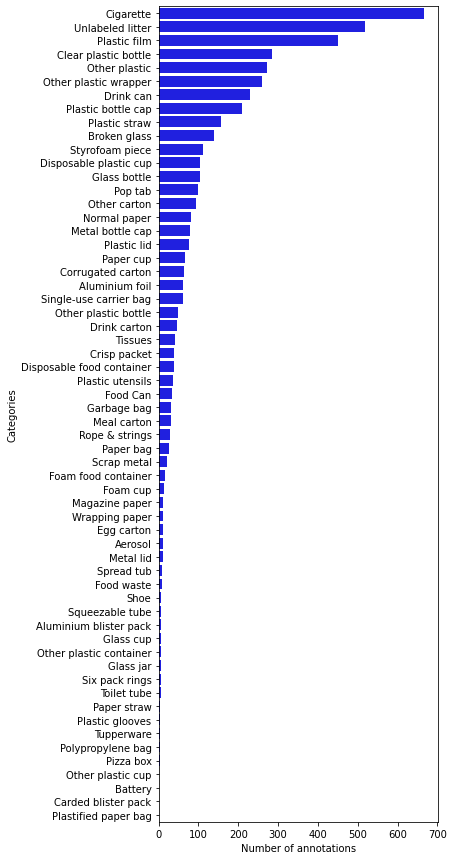

In [24]:
# Count annotations
cat_histogram = np.zeros(nr_cats,dtype=int)
for ann in anns:
    cat_histogram[ann['category_id']] += 1

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(5,15))

# Convert to DataFrame
df = pd.DataFrame({'Categories': cat_names, 'Number of annotations': cat_histogram})
df = df.sort_values('Number of annotations', 0, False)

# Plot the histogram
# sns.set_color_codes("pastel")
# sns.set(style="whitegrid")
plot_1 = sns.barplot(x="Number of annotations", y="Categories", data=df,
            label="Total", color="b")

# fig = plot_1.get_figure()
# fig.savefig("output.png")

and this shows the number of annotations per super category;

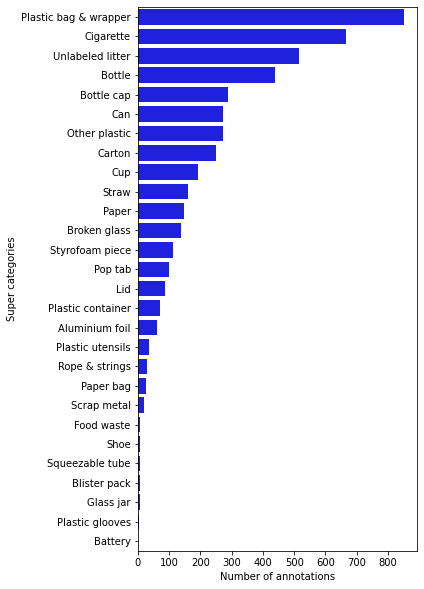

In [25]:
cat_ids_2_supercat_ids = {}
for cat in categories:
    cat_ids_2_supercat_ids[cat['id']] = super_cat_ids[cat['supercategory']]

# Count annotations
super_cat_histogram = np.zeros(nr_super_cats,dtype=int)
for ann in anns:
    cat_id = ann['category_id']
    super_cat_histogram[cat_ids_2_supercat_ids[cat_id]] +=1
    
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(5,10))

# Convert to DataFrame
d ={'Super categories': super_cat_names, 'Number of annotations': super_cat_histogram}
df = pd.DataFrame(d)
df = df.sort_values('Number of annotations', 0, False)

# sns.set_color_codes("pastel")
# sns.set(style="whitegrid")
plot_1 = sns.barplot(x="Number of annotations", y="Super categories", data=df,
            label="Total", color="b")
#plot_1.set_title('Annotations per super category',fontsize=20)   

### 1.1 Background stats

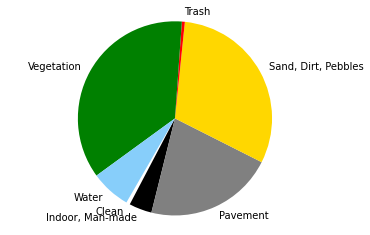

In [26]:
# Get scene cat names
scene_cats = dataset['scene_categories']
scene_name = []
for scene_cat in scene_cats:
    scene_name.append(scene_cat['name'])

nr_scenes = len(scene_cats)
scene_cat_histogram = np.zeros(nr_scenes,dtype=int)

for scene_ann in dataset['scene_annotations']:    
    scene_ann_ids = scene_ann['background_ids']
    for scene_ann_id in scene_ann_ids:
        if scene_ann_id<len(scene_cats):
            scene_cat_histogram[scene_ann_id]+=1

# Convert to DataFrame
df = pd.DataFrame({'scene_cats': scene_cats, 'nr_annotations': scene_cat_histogram})
 
# Plot
colors = ['white','black','gray', 'gold', 'red','green','lightskyblue']
plt.pie(scene_cat_histogram, labels=scene_name, colors = colors,
      shadow=False, startangle=-120)
 
plt.axis('equal')
plt.show()

## 2. Visualize dataset graph

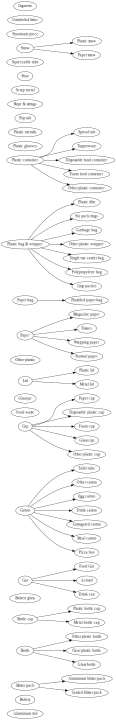

In [27]:
from graphviz import Digraph
# Note: graphviz may require more than pip installation due to path issue: e.g. brew install graphviz for mac

#g = Digraph('G', filename='hello.gv')
dot = Digraph('Dataset graph', filename='asd.gv')
dot.attr(rankdir='LR', size='8,10')

for cat_it in categories:
    dot.node(cat_it['name'])
    if cat_it['name']==cat_it['supercategory']:
        dot.node(cat_it['supercategory'])
    else:
        dot.edge(cat_it['supercategory'], cat_it['name'])
dot
# Uncomment next line to print pdf
#dot.view()

## 3. Visualize Annotated Images

For simplicity, to select and show the dataset images with the respective masks, we make use of the COCO API.
The script below shows how to load and visualize an image with all its annotations.

Unfortunately, several python libraries do not take into account the EXIF orientation tag, thus we have to explicitly rotate the images. Alternatively you can use instead OpenCV.

In [28]:
from PIL import Image, ExifTags
from pycocotools.coco import COCO
from matplotlib.patches import Polygon, Rectangle
from matplotlib.collections import PatchCollection
import colorsys
import random
import pylab

# User settings
image_filepath = 'batch_11/000028.jpg'
pylab.rcParams['figure.figsize'] = (28,28)
####################

# Obtain Exif orientation tag code
for orientation in ExifTags.TAGS.keys():
    if ExifTags.TAGS[orientation] == 'Orientation':
        break

# Loads dataset as a coco object
coco = COCO(anns_file_path)

# Find image id
img_id = -1
for img in imgs:
    if img['file_name'] == image_filepath:
        img_id = img['id']
        break

# Show image and corresponding annotations
if img_id == -1:
    print('Incorrect file name')
else:

    # Load image
    print(image_filepath)
    I = Image.open(dataset_path + '/' + image_filepath)

    # Load and process image metadata
    if I._getexif():
        exif = dict(I._getexif().items())
        # Rotate portrait and upside down images if necessary
        if orientation in exif:
            if exif[orientation] == 3:
                I = I.rotate(180,expand=True)
            if exif[orientation] == 6:
                I = I.rotate(270,expand=True)
            if exif[orientation] == 8:
                I = I.rotate(90,expand=True)

    # Show image
    fig,ax = plt.subplots(1)
    plt.axis('off')
    plt.imshow(I)

    # Load mask ids
    annIds = coco.getAnnIds(imgIds=img_id, catIds=[], iscrowd=None)
    anns_sel = coco.loadAnns(annIds)

    # Show annotations
    for ann in anns_sel:
        color = colorsys.hsv_to_rgb(np.random.random(),1,1)
        for seg in ann['segmentation']:
            poly = Polygon(np.array(seg).reshape((int(len(seg)/2), 2)))
            p = PatchCollection([poly], facecolor=color, edgecolors=color,linewidths=0, alpha=0.4)
            ax.add_collection(p)
            p = PatchCollection([poly], facecolor='none', edgecolors=color, linewidths=2)
            ax.add_collection(p)
        [x, y, w, h] = ann['bbox']
        rect = Rectangle((x,y),w,h,linewidth=2,edgecolor=color,
                         facecolor='none', alpha=0.7, linestyle = '--')
        ax.add_patch(rect)

    plt.show()

Output hidden; open in https://colab.research.google.com to view.

The script below shows how to filter images by either category or supercategory.

Go ahead and try different (super)categories searches by changing the `category_name`.
Note that small objects may be hard to see.

In [29]:
from PIL import Image, ExifTags
from pycocotools.coco import COCO
from matplotlib.patches import Polygon, Rectangle
from matplotlib.collections import PatchCollection
import colorsys
import random
import pylab

# User settings
nr_img_2_display = 10
category_name = 'Bottle'#  --- Insert the name of one of the categories or super-categories above
pylab.rcParams['figure.figsize'] = (14,14)
####################

# Obtain Exif orientation tag code
for orientation in ExifTags.TAGS.keys():
    if ExifTags.TAGS[orientation] == 'Orientation':
        break

# Loads dataset as a coco object
coco = COCO(anns_file_path)

# Get image ids
imgIds = []
catIds = coco.getCatIds(catNms=[category_name])
if catIds:
    # Get all images containing an instance of the chosen category
    imgIds = coco.getImgIds(catIds=catIds)
else:
    # Get all images containing an instance of the chosen super category
    catIds = coco.getCatIds(supNms=[category_name])
    for catId in catIds:
        imgIds += (coco.getImgIds(catIds=catId))
    imgIds = list(set(imgIds))

nr_images_found = len(imgIds) 
print('Number of images found: ',nr_images_found)

# Select N random images
random.shuffle(imgIds)
imgs = coco.loadImgs(imgIds[0:min(nr_img_2_display,nr_images_found)])

for img in imgs:
    image_path = dataset_path + '/' + img['file_name']
    # Load image
    I = Image.open(image_path)
    
    # Load and process image metadata
    if I._getexif():
        exif = dict(I._getexif().items())
        # Rotate portrait and upside down images if necessary
        if orientation in exif:
            if exif[orientation] == 3:
                I = I.rotate(180,expand=True)
            if exif[orientation] == 6:
                I = I.rotate(270,expand=True)
            if exif[orientation] == 8:
                I = I.rotate(90,expand=True)
    
    # Show image
    fig,ax = plt.subplots(1)
    plt.axis('off')
    plt.imshow(I)

    # Load mask ids
    annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
    anns_sel = coco.loadAnns(annIds)
    
    # Show annotations
    for ann in anns_sel:
        color = colorsys.hsv_to_rgb(np.random.random(),1,1)
        for seg in ann['segmentation']:
            poly = Polygon(np.array(seg).reshape((int(len(seg)/2), 2)))
            p = PatchCollection([poly], facecolor=color, edgecolors=color,linewidths=0, alpha=0.4)
            ax.add_collection(p)
            p = PatchCollection([poly], facecolor='none', edgecolors=color, linewidths=2)
            ax.add_collection(p)
        [x, y, w, h] = ann['bbox']
        rect = Rectangle((x,y),w,h,linewidth=2,edgecolor=color,
                         facecolor='none', alpha=0.7, linestyle = '--')
        ax.add_patch(rect)

    plt.show()

Output hidden; open in https://colab.research.google.com to view.

# 모델 돌리기

In [40]:
# 경로 변경해 주기
os.chdir('/content/TACO/detector')

import os
import sys
import itertools
import math
import logging
import json
import re
import random
from collections import OrderedDict
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.lines as lines
from matplotlib.patches import Polygon

# Root directory of the project
ROOT_DIR = os.path.abspath(".")

import utils
import visualize
from visualize import display_images
import model as modellib
from config import Config
from model import log

%matplotlib inline

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

## Load Dataset

In [41]:
import csv
import dataset

# Load class map - these tables map the original TACO classes to your desired class system
# and allow you to discard classes that you don't want to include.
class_map = {}
with open("./taco_config/map_1.csv") as csvfile:
    reader = csv.reader(csvfile)
    class_map = {row[0]:row[1] for row in reader}

# Load full dataset or a subset
TACO_DIR = "../data"
round = None # Split number: If None, loads full dataset else if int > 0 selects split no 
subset = "train" # Used only when round !=None, Options: ('train','val','test') to select respective subset
dataset = dataset.Taco()
taco = dataset.load_taco(TACO_DIR, round, subset, class_map=class_map, return_taco=True)

# Must call before using the dataset
dataset.prepare()

print("Class Count: {}".format(dataset.num_classes))
for i, info in enumerate(dataset.class_info):
    print("{:3}. {:50}".format(i, info['name']))

creating index...
index created!
Number of images used: 1500
Class Count: 2
  0. BG                                                
  1. Litter                                            


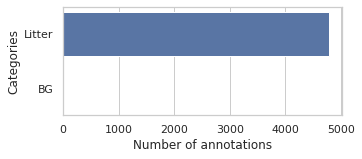

In [44]:
import seaborn as sns
import pandas as pd

# Count annotations
cat_histogram = np.zeros(dataset.num_classes,dtype=int)
class_names = []
for i, info in enumerate(dataset.class_info):
    ann_per_cat = taco.getAnnIds(catIds=i, iscrowd=None)
    cat_histogram[i] = len(ann_per_cat)
    class_names.append(info['name'])

# Initialize the matplotlib figure
_, ax = plt.subplots(figsize=(5,1*dataset.num_classes))

# Convert to DataFrame
d ={'Categories': class_names, 'Number of annotations': cat_histogram}
df = pd.DataFrame(d)
df = df.sort_values('Number of annotations', 0, False)

# Plot the histogram
sns.set_color_codes("pastel")
sns.set(style="whitegrid")
plot_1 = sns.barplot(x="Number of annotations", y="Categories", data=df,
            label="Total", color="b")

fig = plot_1.get_figure()

## Image stats

Before deciding your network configuration,it's a good idea look into the following statistics

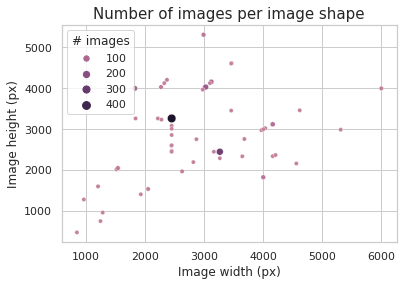

In [45]:
# Parsing image shapes (resolutions)
widths = []
heights = []
shape_freqs = []
img_shapes_keys = {}
for img in taco.dataset['images']:
    key = str(img['width'])+'-'+str(img['height'])
    if key in img_shapes_keys:
        shape_id = img_shapes_keys[key]
        shape_freqs[shape_id] += 1
    else:
        img_shapes_keys[key] = len(widths)
        widths.append(img['width'])
        heights.append(img['height'])
        shape_freqs.append(1)

d ={'Image width (px)': widths, 'Image height (px)': heights, '# images': shape_freqs}
df = pd.DataFrame(d)
cmap = sns.cubehelix_palette(dark=.1, light=.6, as_cmap=True)
plot = sns.scatterplot(x="Image width (px)", y="Image height (px)", size='# images', hue="# images", palette = cmap,data=df)
plot = plot.set_title('Number of images per image shape',fontsize=15)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean number of annotations per image: 3.1893333333333334


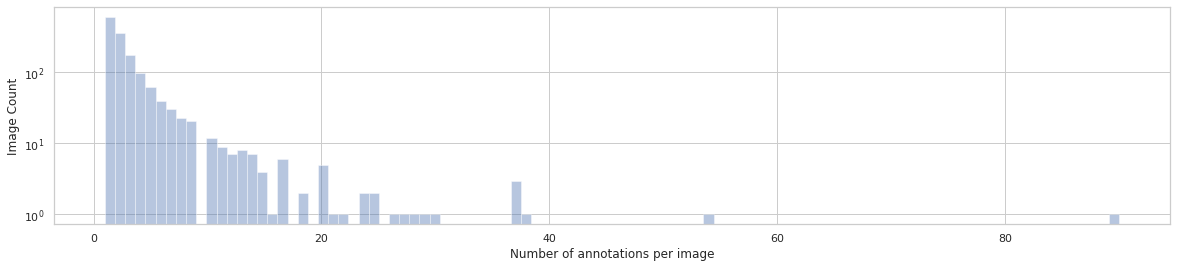

In [46]:
nr_annotation_per_image = []
for img in taco.dataset['images']:
    annIds = taco.getAnnIds(imgIds=img['id'], catIds=[])
    nr_annotation_per_image.append(len(annIds))

plt.figure(figsize=(20,4))
ax = sns.distplot(nr_annotation_per_image,kde=False,bins=100)
ax.set_yscale('log')
ax.set(xlabel='Number of annotations per image', ylabel='Image Count')

print('Mean number of annotations per image:',np.mean(nr_annotation_per_image))

According to MS COCO Evaluation. This dataset has:
1838 small objects (area<32*32 px)
2742 medium objects (area<96*96 px)
3352 large objects (area>96*96 px)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Number of bboxes smaller than 1024: 4784
Number of bboxes larger than 1024: 0
Number of missing annotations 660


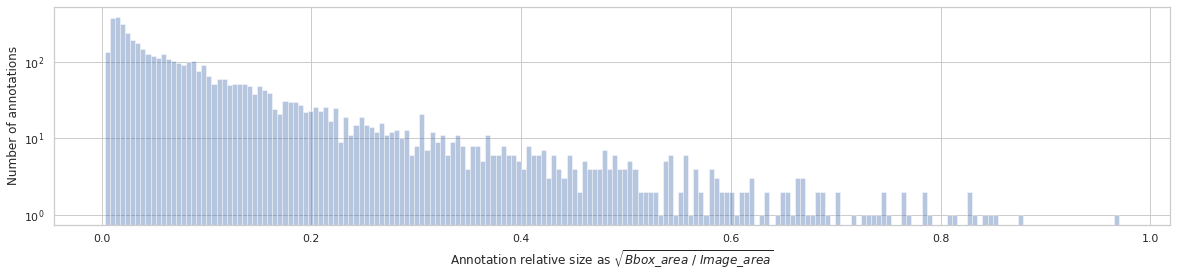

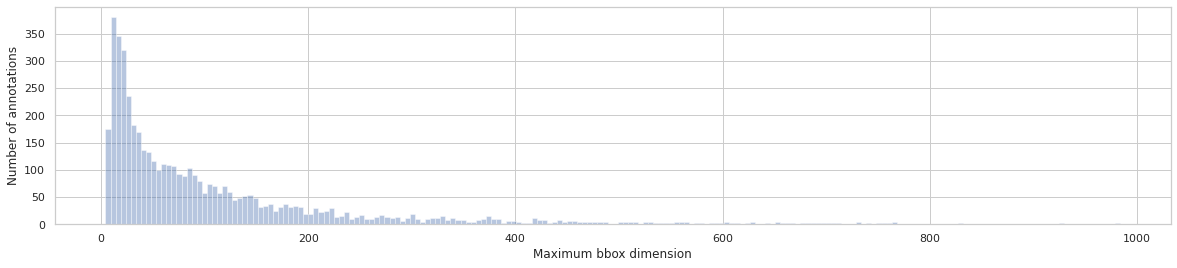

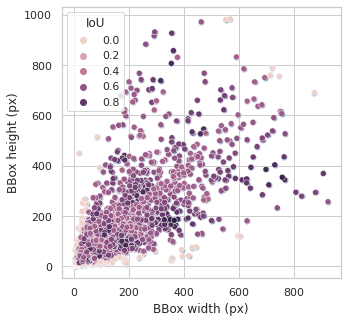

In [47]:
bbox_widths = []
bbox_heights = []
obj_areas_sqrt = []
obj_areas_sqrt_fraction = []
bbox_aspect_ratio = []
max_image_dim = 1024

for ann in taco.dataset['annotations']:
    
    imgs = taco.loadImgs(ann['image_id'])
    
    resize_scale = max_image_dim/max(imgs[0]['width'], imgs[0]['height'])
    # Uncomment this to work on original image size
#     resize_scale = 1
    
    bbox_widths.append(ann['bbox'][2]*resize_scale)
    bbox_heights.append(ann['bbox'][3]*resize_scale)
    obj_area = ann['bbox'][2]*ann['bbox'][3]*resize_scale**2 # ann['area']
    obj_areas_sqrt.append(np.sqrt(obj_area))
        
    img_area = imgs[0]['width']*imgs[0]['height']*resize_scale**2
    obj_areas_sqrt_fraction.append(np.sqrt(obj_area/img_area))
    
print('According to MS COCO Evaluation. This dataset has:')
print(np.sum(np.array(obj_areas_sqrt)<32), 'small objects (area<32*32 px)')
print(np.sum(np.array(obj_areas_sqrt)<64), 'medium objects (area<96*96 px)')
print(np.sum(np.array(obj_areas_sqrt)<96), 'large objects (area>96*96 px)')
    
# d ={'Bbox width (px)': bbox_widths, 'Bbox height (px)': bbox_heights, 'area': seg_areas}
# df = pd.DataFrame(d)

plt.figure(figsize=(20,4))
ax = sns.distplot(obj_areas_sqrt_fraction,kde=False, bins=200)
ax.set_yscale('log')
ax = ax.set(xlabel=r'Annotation relative size as $\sqrt{ Bbox\_area \ /  \ Image\_area}$', ylabel='Number of annotations')

plt.figure(figsize=(20,4))
ax = sns.distplot(np.maximum(np.array(bbox_widths),np.array(bbox_heights)),kde=False, bins=200)
ax = ax.set(xlabel='Maximum bbox dimension', ylabel='Number of annotations')

import colorsys
fig, ax = plt.subplots(1, 1, figsize=(5,5))

# Plotting bbox dims
d ={'BBox width (px)': bbox_widths, 'BBox height (px)': bbox_heights}
df = pd.DataFrame(d)
cmap = sns.cubehelix_palette(dark=.1, light=.6, as_cmap=True)
ax = sns.scatterplot(x="BBox width (px)", y="BBox height (px)", palette = cmap,data=df)

print('Number of bboxes smaller than 1024:',np.sum(np.array(bbox_widths)<1024))
print('Number of bboxes larger than 1024:',np.sum(np.array(bbox_widths)>1024))

# anchors = [(32,32),(64,64),(128,128),(256,256),(512,512)]
scales, ratios = np.meshgrid(np.array([16,32,64,128,256,512]), np.array([0.5,1,2]))
scales = scales.flatten()
ratios = ratios.flatten()
# Enumerate heights and widths from scales and ratios
anchor_heights = scales / np.sqrt(ratios)
anchor_widths = scales * np.sqrt(ratios)

IoUs = []
for i in range(len(bbox_widths)):
    bbox_area = bbox_widths[i]*bbox_heights[i]
    IoU_max = 0.0
    for j in range(len(anchor_heights)):
        anchor_area = anchor_heights[j]*anchor_widths[j]
        intersection_area = min(anchor_widths[j],bbox_widths[i])*min(anchor_heights[j], bbox_heights[i])
        IoU = intersection_area / (bbox_area + anchor_area - intersection_area)
        if IoU>0.5:
            IoU_max = IoU
    IoUs.append(IoU_max)
    
print('Number of missing annotations', np.sum(np.array(IoUs)==0.0))
  
# Plotting bbox dims
d ={'BBox width (px)': bbox_widths, 'BBox height (px)': bbox_heights, 'IoU': IoUs}
df = pd.DataFrame(d)
cmap = sns.cubehelix_palette(dark=.1, light=.6, as_cmap=True)
ax = sns.scatterplot(x="BBox width (px)", y="BBox height (px)", hue = 'IoU',data=df)

## Mask-RCNN Configuration

In [48]:
class TacoTestConfig(Config):
    NAME = "taco"
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    DETECTION_MIN_CONFIDENCE = 0.3
    NUM_CLASSES = dataset.num_classes
#     IMAGE_MAX_DIM = 1024
#     IMAGE_MIN_DIM = 1024
#     IMAGE_RESIZE_MODE = "square"
config = TacoTestConfig()

## Image Cropping

In [50]:
from random import seed
from random import randint
import skimage.io
import skimage.transform

seed(1)

# Load random image
image_id = np.random.choice(len(dataset.image_ids))
image_ori = dataset.load_image(image_id)
masks_ori, _ = dataset.load_mask(image_id)

image_dtype = image_ori.dtype
nr_annotations = np.shape(masks_ori)[-1]

bboxes = utils.extract_bboxes(masks_ori)

# Initialize the matplotlib figure
fig, ax = plt.subplots(nr_annotations+1, 1, figsize=(10,10*(nr_annotations+1)))
ax[0].imshow(image_ori)

i=0
for bbox_id in range(len(bboxes)):
    
    image = image_ori
    masks = masks_ori
    
    bboxes_cpy = bboxes
    y1, x1, y2, x2 = bboxes_cpy[bbox_id]
    h, w = image.shape[:2]
    
    bbox_width = x2-x1
    bbox_height = y2-y1
    
    img_max_dim = max(h,w)
    bbox_max_dim = max(bbox_width,bbox_height)
    
    print('Image original shape:',image.shape)
    print('Bbox original shape:',y1, x1, y2, x2)
    
    bbox_max_dim_threshold_4_scaling = config.IMAGE_MAX_DIM*0.8
    
    # If bbox is big enough or too big, downsize full image
    if bbox_max_dim > bbox_max_dim_threshold_4_scaling:
        
        # Rescale
        downscale_at_least = min(1.,config.IMAGE_MAX_DIM/bbox_max_dim)
        downscale_min = config.IMAGE_MAX_DIM/img_max_dim
        
        scale = random.random()*(downscale_at_least-downscale_min)+downscale_min
        
        print('Downscaling image by',scale)
        print("Scale interval:", downscale_min, downscale_at_least)
        
        # Actually scale Image   
        image = skimage.transform.resize(image, (np.round(h * scale), np.round(w * scale)),order=1,
                                         mode="constant", preserve_range=True)
    
        h, w = image.shape[:2]
        img_max_dim = max(h,w)
    
        # Padding
        top_pad = (img_max_dim - h) // 2
        bottom_pad = img_max_dim - h - top_pad
        left_pad = (img_max_dim - w) // 2
        right_pad = img_max_dim - w - left_pad
        padding = [(top_pad, bottom_pad), (left_pad, right_pad), (0, 0)]
        image = np.pad(image, padding, mode='constant', constant_values=0).astype(image_dtype)
        window = (top_pad, left_pad, h + top_pad, w + left_pad)
        
        # Adjust mask and other vars
        masks = utils.resize_mask(masks, scale, padding)
        bboxes_cpy = utils.extract_bboxes(masks)
        y1, x1, y2, x2 = bboxes_cpy[bbox_id]
        h, w = image.shape[:2]
        
        print('Image resized shape:',image.shape)
    
    # Select crop around target annotation
    x0_min = max(x2-config.IMAGE_MAX_DIM,0) 
    x0_max = min(x1,w-config.IMAGE_MAX_DIM)
    x0 = randint(x0_min, x0_max)
    y0_min = max(y2-config.IMAGE_MAX_DIM,0) 
    y0_max = min(y1,h-config.IMAGE_MAX_DIM)
    y0 = randint(y0_min, y0_max)
    
    if padding:
        max_dim = config.IMAGE_MAX_DIM
        window = (max(top_pad,y0)-y0, max(left_pad,x0)-x0, min(window[2],y0+max_dim)-y0, min(window[3],x0+max_dim)-x0)
        print(window)
    
    # Crop
    crop = (y0, x0, config.IMAGE_MAX_DIM, config.IMAGE_MAX_DIM)
    image = image[y0:y0 + config.IMAGE_MAX_DIM, x0:x0 + config.IMAGE_MAX_DIM]
    masks = masks[y0:y0 + config.IMAGE_MAX_DIM, x0:x0 + config.IMAGE_MAX_DIM]
    ax[i+1].imshow(image)
    ax[i+1].axis('off')
    i+=1

Output hidden; open in https://colab.research.google.com to view.

## Data Augmentation Demo

In [51]:
import imgaug as ia
from imgaug import augmenters as iaa
import imageio

#ia.seed(1)
nr_augmentations = 10

# Load random image
# image_id = np.random.choice(len(dataset.image_ids))
# image = dataset.load_image(image_id)
# masks, _ = dataset.load_mask(image_id)

# Define our augmentation pipeline.
seq = iaa.Sequential([
        iaa.AdditiveGaussianNoise(scale=0.01 * 255, name="AWGN"),
        iaa.GaussianBlur(sigma=(0.0, 3.0), name="Blur"),
        # iaa.Dropout([0.0, 0.05], name='Dropout'), # drop 0-5% of all pixels
        iaa.Fliplr(0.5),
        iaa.Add((-20, 20),name="Add"),
        iaa.Multiply((0.8, 1.2), name="Multiply"),
#       iaa.Affine(scale=(0.8, 1.1)),
#       iaa.Affine(translate_percent={"x": (-0.2, 0.2), "y": (-0.2, 0.2)}),
        iaa.Affine(rotate=(-45, 45)),  # rotate by -45 to 45 degrees
    ], random_order=True)

# Change activated augmentors for masks
def activator_masks(images, augmenter, parents, default):
    if augmenter.name in ["Blur", "AWGN", "Add","Multiply"]:
        return False
    else:
        # default value for all other augmenters
        return default
    
hooks_masks = ia.HooksImages(activator=activator_masks)

# Initialize the matplotlib figure
fig, aux = plt.subplots(ncols=2, nrows=nr_augmentations+1, figsize=(15,60))

aux[0,0].imshow(image)
aux[0,0].axis('off')
aux[0,1].imshow(masks.sum(axis=2)) # form an unique segmask from multiple masks
aux[0,1].axis('off')

print('This may take some time, as we are working with the original image size...')

# Augment images and masks
for i in range(nr_augmentations):
    seq_det = seq.to_deterministic()
    image_augmented = seq_det.augment_image(image)
    mask_augmented = seq_det.augment_image(masks.astype(np.uint8), hooks=hooks_masks)
    seg_mask = mask_augmented.sum(axis=2)

    aux[i+1,0].imshow(image_augmented)
    aux[i+1,0].axis('off')
    aux[i+1,1].imshow(seg_mask)
    aux[i+1,1].axis('off')
    
plt.subplots_adjust(wspace=0.2, hspace=0)

Output hidden; open in https://colab.research.google.com to view.

## Display Samples

Load and display images and masks

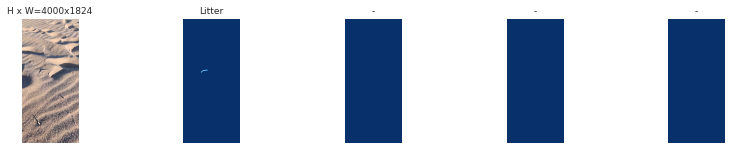

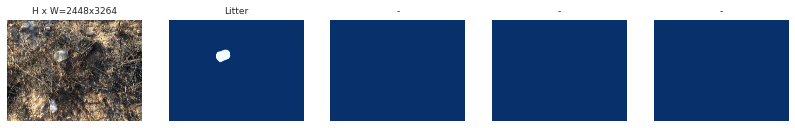

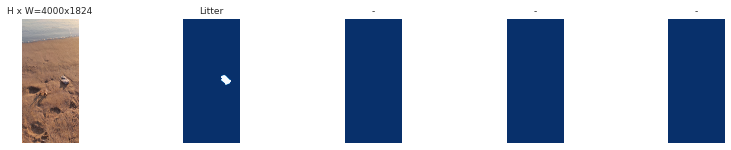

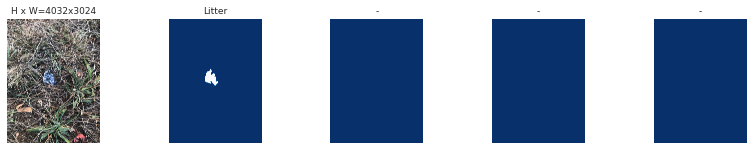

In [52]:
# Load and display random samples
image_ids = np.random.choice(dataset.image_ids, 4)
for image_id in image_ids:
    image = dataset.load_image(image_id)
    mask, class_ids = dataset.load_mask(image_id)
    visualize.display_top_masks(image, mask, class_ids, dataset.class_names)

## Bounding Boxes

Rather than using bounding box coordinates provided by the source datasets, we compute the bounding boxes from masks instead. This allows us to handle bounding boxes consistently regardless of the source dataset, and it also makes it easier to resize, rotate, or crop images because we simply generate the bounding boxes from the updates masks rather than computing bounding box transformation for each type of image transformation.

## Resize Images

To support multiple images per batch, images are resized to one size (1024x1024). Aspect ratio is preserved, though. If an image is not square, then zero padding is added at the top/bottom or right/left.

[1 1 1]
image_id  1244 
image                    shape: (3264, 2448, 3)       min:    0.00000  max:  255.00000  uint8


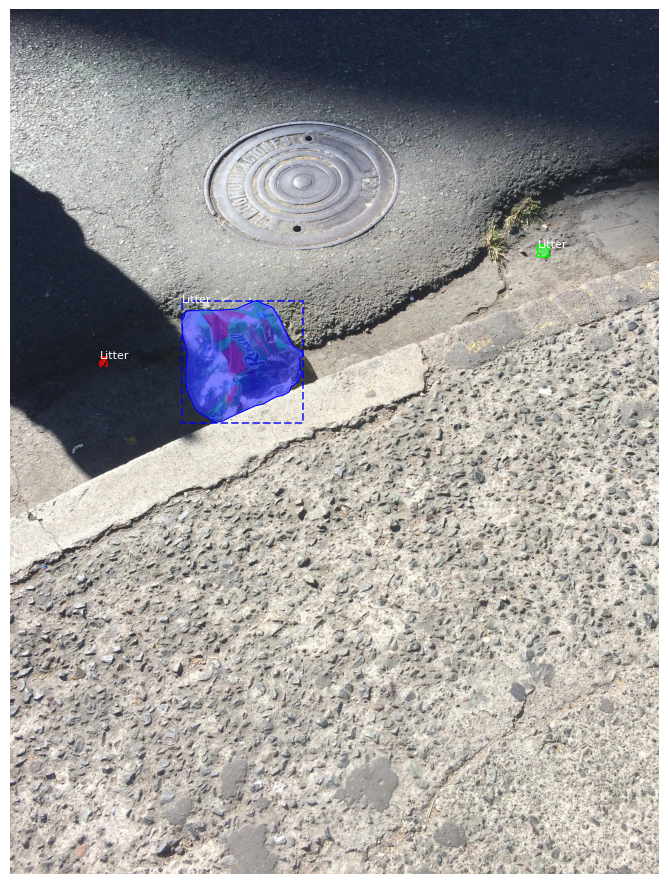

In [53]:
# Load random image and mask.
image_id = random.choice(dataset.image_ids)
image = dataset.load_image(image_id)
mask, class_ids = dataset.load_mask(image_id)
print(class_ids)
# Compute Bounding box
bbox = utils.extract_bboxes(mask)

# Display image and additional stats
print("image_id ", image_id, dataset.image_reference(image_id))
log("image", image)
# log("mask", mask)
# log("class_ids", class_ids)
# log("bbox", bbox)
# Display image and instances
visualize.display_instances(image, bbox, mask, class_ids, dataset.class_names)

image_id:  759 
Original shape:  (3264, 2448, 3)
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
mask                     shape: (1024, 1024, 1)       min:    0.00000  max:    1.00000  bool
class_ids                shape: (1,)                  min:    1.00000  max:    1.00000  int32
bbox                     shape: (1, 4)                min:  464.00000  max:  576.00000  int32


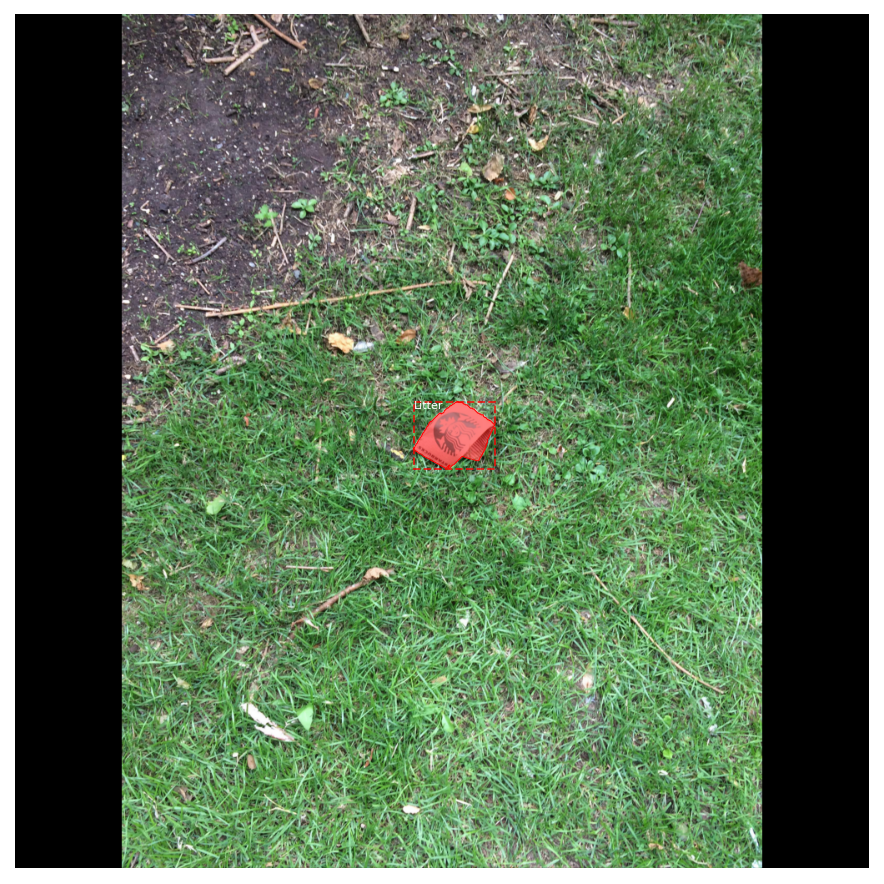

In [54]:
# Load random image and mask.
image_id = np.random.choice(dataset.image_ids, 1)[0]
image = dataset.load_image(image_id)
mask, class_ids = dataset.load_mask(image_id)
original_shape = image.shape
# Resize
image, window, scale, padding, _ = utils.resize_image(
    image, 
    min_dim=config.IMAGE_MIN_DIM, 
    max_dim=config.IMAGE_MAX_DIM,
    mode=config.IMAGE_RESIZE_MODE)
mask = utils.resize_mask(mask, scale, padding)
# Compute Bounding box
bbox = utils.extract_bboxes(mask)

# Display image and additional stats
print("image_id: ", image_id, dataset.image_reference(image_id))
print("Original shape: ", original_shape)
log("image", image)
log("mask", mask)
log("class_ids", class_ids)
log("bbox", bbox)
# Display image and instances
visualize.display_instances(image, bbox, mask, class_ids, dataset.class_names)

## Mini Masks

Instance binary masks can get large when training with high resolution images. For example, if training with 1024x1024 image then the mask of a single instance requires 1MB of memory (Numpy uses bytes for boolean values). If an image has 100 instances then that's 100MB for the masks alone. 

To improve training speed, we optimize masks by:
* We store mask pixels that are inside the object bounding box, rather than a mask of the full image. Most objects are small compared to the image size, so we save space by not storing a lot of zeros around the object.
* We resize the mask to a smaller size (e.g. 56x56). For objects that are larger than the selected size we lose a bit of accuracy. But most object annotations are not very accuracy to begin with, so this loss is negligable for most practical purposes. Thie size of the mini_mask can be set in the config class.

To visualize the effect of mask resizing, and to verify the code correctness, we visualize some examples.

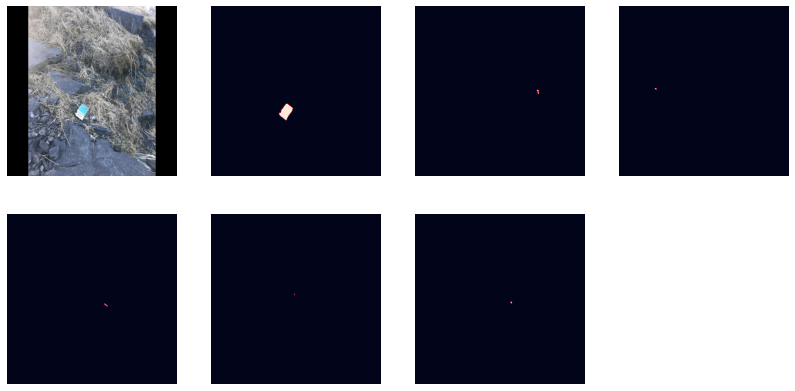

image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
image_meta               shape: (14,)                 min:    0.00000  max: 4032.00000  int64
class_ids                shape: (3,)                  min:    1.00000  max:    1.00000  int32
bbox                     shape: (3, 4)                min:   67.00000  max:  768.00000  int32
mask                     shape: (512, 512, 3)         min:    0.00000  max:    1.00000  bool


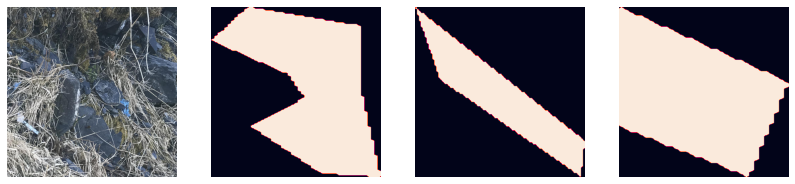

In [55]:
image_id = np.random.choice(dataset.image_ids, 1)[0]
image, image_meta, class_ids, bbox, mask = modellib.load_image_gt(
    dataset, config, image_id, use_mini_mask=False)

display_images([image]+[mask[:,:,i] for i in range(min(mask.shape[-1], 7))])

image, image_meta, class_ids, bbox, mask = modellib.load_image_gt(
    dataset, config, image_id, use_mini_mask=True)

log("image", image)
log("image_meta", image_meta)
log("class_ids", class_ids)
log("bbox", bbox)
log("mask", mask)

display_images([image]+[mask[:,:,i] for i in range(min(mask.shape[-1], 7))])

ValueError: ignored

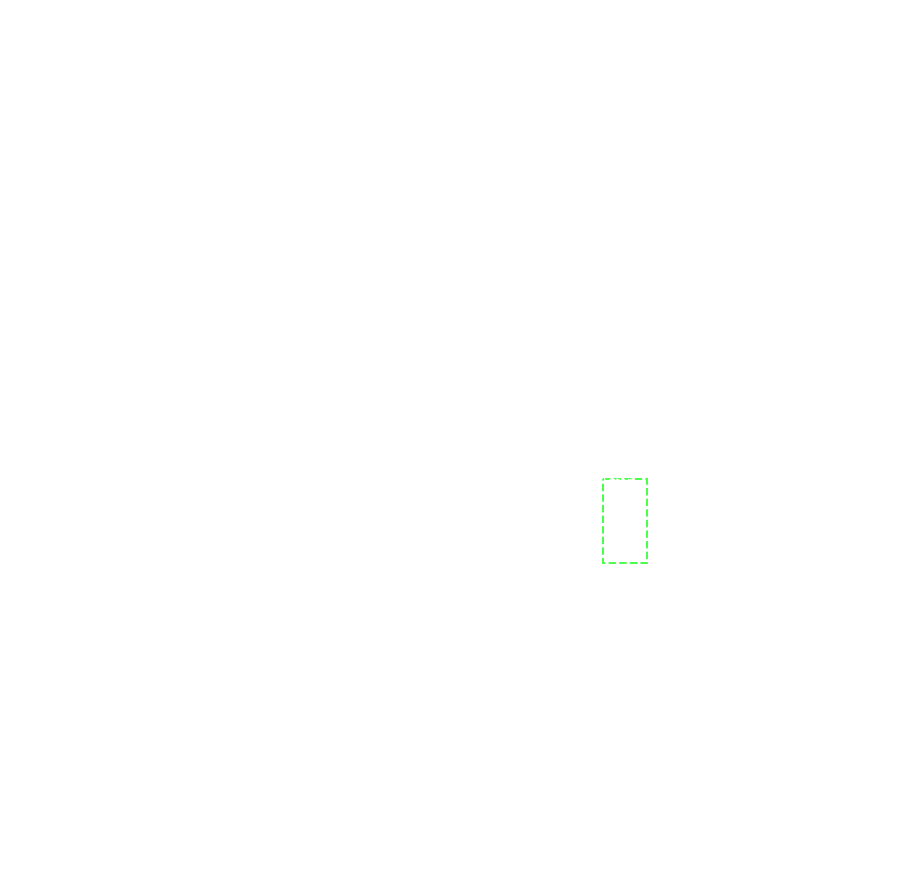

In [57]:
visualize.display_instances(image, bbox, mask, class_ids, dataset.class_names)

mask                     shape: (1024, 1024, 6)       min:    0.00000  max:    1.00000  bool


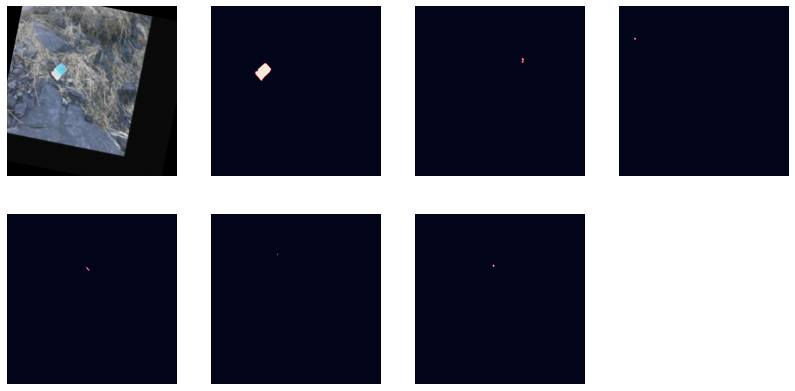

In [58]:
# Add augmentation and mask resizing.

# Image Augmentation Pipeline
aug_pipeline = iaa.Sequential([
    iaa.AdditiveGaussianNoise(scale=0.01 * 255, name="AWGN"),
    iaa.GaussianBlur(sigma=(0.0, 3.0), name="Blur"),
    # iaa.Dropout([0.0, 0.05], name='Dropout'), # drop 0-5% of all pixels
    iaa.Fliplr(0.5),
    iaa.Add((-20, 20),name="Add"),
    iaa.Multiply((0.8, 1.2), name="Multiply"),
    iaa.Affine(scale=(0.8, 2.0)),
    iaa.Affine(translate_percent={"x": (-0.2, 0.2), "y": (-0.2, 0.2)}),
    iaa.Affine(rotate=(-45, 45)),  # rotate by -45 to 45 degrees
], random_order=True)
    
image, image_meta, class_ids, bbox, mask = modellib.load_image_gt(
    dataset, config, image_id, aug_pipeline, use_mini_mask=False)
log("mask", mask)
display_images([image]+[mask[:,:,i] for i in range(min(mask.shape[-1], 7))])

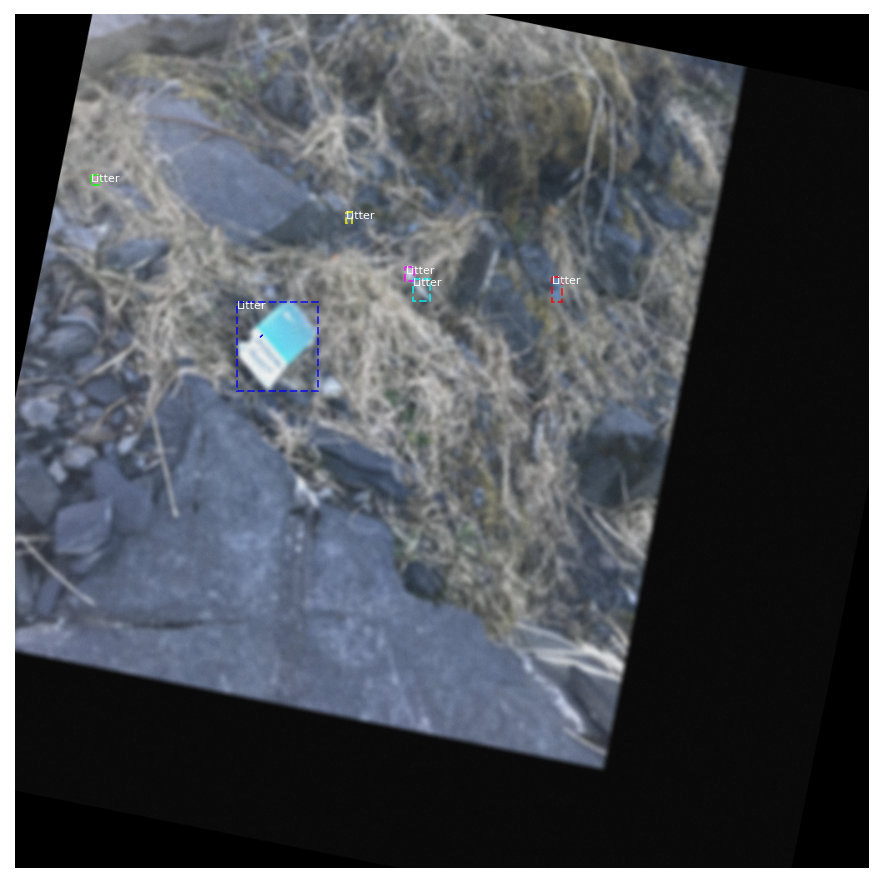

In [59]:
mask = utils.expand_mask(bbox, mask, image.shape)
visualize.display_instances(image, bbox, mask, class_ids, dataset.class_names)

## Anchors

The order of anchors is important. Use the same order in training and prediction phases. And it must match the order of the convolution execution.

For an FPN network, the anchors must be ordered in a way that makes it easy to match anchors to the output of the convolution layers that predict anchor scores and shifts. 
* Sort by pyramid level first. All anchors of the first level, then all of the second and so on. This makes it easier to separate anchors by level.
* Within each level, sort anchors by feature map processing sequence. Typically, a convolution layer processes a feature map starting from top-left and moving right row by row. 
* For each feature map cell, pick any sorting order for the anchors of different ratios. Here we match the order of ratios passed to the function.

**Anchor Stride:**
In the FPN architecture, feature maps at the first few layers are high resolution. For example, if the input image is 1024x1024 then the feature map of the first layer is 256x256, which generates about 200K anchors (256*256*3). These anchors are 32x32 pixels and their stride relative to image pixels is 4 pixels, so there is a lot of overlap. We can reduce the load significantly if we generate anchors for every other cell in the feature map. A stride of 2 will cut the number of anchors by 4, for example. 

In this implementation we use an anchor stride of 2, which is different from the paper.

In [60]:
# Generate Anchors
backbone_shapes = modellib.compute_backbone_shapes(config, config.IMAGE_SHAPE)
anchors = utils.generate_pyramid_anchors(config.RPN_ANCHOR_SCALES, 
                                          config.RPN_ANCHOR_RATIOS,
                                          backbone_shapes,
                                          config.BACKBONE_STRIDES, 
                                          config.RPN_ANCHOR_STRIDE)

print(backbone_shapes)
# Print summary of anchors
num_levels = len(backbone_shapes)
anchors_per_cell = len(config.RPN_ANCHOR_RATIOS)
print("Count: ", anchors.shape[0])
print("Scales: ", config.RPN_ANCHOR_SCALES)
print("ratios: ", config.RPN_ANCHOR_RATIOS)
print("Anchors per Cell: ", anchors_per_cell)
print("Levels: ", num_levels)
anchors_per_level = []
for l in range(num_levels):
    num_cells = backbone_shapes[l][0] * backbone_shapes[l][1]
    anchors_per_level.append(anchors_per_cell * num_cells // config.RPN_ANCHOR_STRIDE**2)
    print("Anchors in Level {}: {}".format(l, anchors_per_level[l]))

[[256 256]
 [128 128]
 [ 64  64]
 [ 32  32]
 [ 16  16]]
Count:  261888
Scales:  (32, 64, 128, 256, 512)
ratios:  [0.5, 1, 2]
Anchors per Cell:  3
Levels:  5
Anchors in Level 0: 196608
Anchors in Level 1: 49152
Anchors in Level 2: 12288
Anchors in Level 3: 3072
Anchors in Level 4: 768


Visualize anchors of one cell at the center of the feature map of a specific level.

Level 0. Anchors: 196608  Feature map Shape: [256 256]
[489.372583  500.6862915 534.627417  523.3137085]
[496. 496. 528. 528.]
[500.6862915 489.372583  523.3137085 534.627417 ]
Level 1. Anchors:  49152  Feature map Shape: [128 128]
[466.745166 489.372583 557.254834 534.627417]
[480. 480. 544. 544.]
[489.372583 466.745166 534.627417 557.254834]
Level 2. Anchors:  12288  Feature map Shape: [64 64]
[421.49033201 466.745166   602.50966799 557.254834  ]
[448. 448. 576. 576.]
[466.745166   421.49033201 557.254834   602.50966799]
Level 3. Anchors:   3072  Feature map Shape: [32 32]
[330.98066402 421.49033201 693.01933598 602.50966799]
[384. 384. 640. 640.]
[421.49033201 330.98066402 602.50966799 693.01933598]
Level 4. Anchors:    768  Feature map Shape: [16 16]
[149.96132803 330.98066402 874.03867197 693.01933598]
[256. 256. 768. 768.]
[330.98066402 149.96132803 693.01933598 874.03867197]


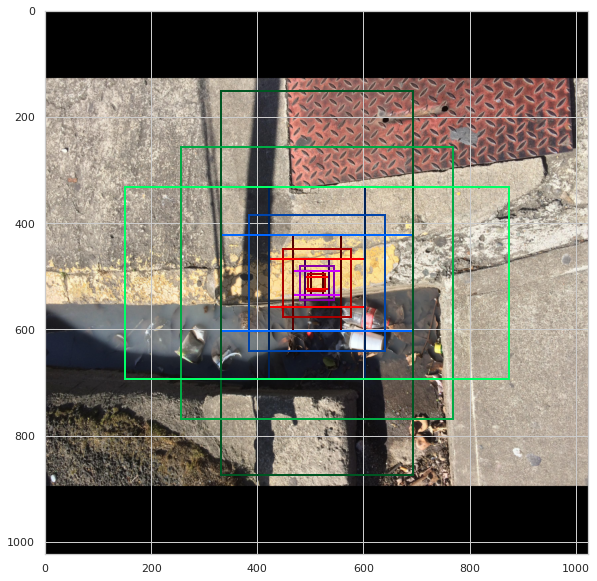

In [61]:
## Visualize anchors of one cell at the center of the feature map of a specific level

# Load and draw random image
image_id = np.random.choice(dataset.image_ids, 1)[0]
image, image_meta, _, _, _ = modellib.load_image_gt(dataset, config, image_id)
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.imshow(image)
levels = len(backbone_shapes)

for level in range(levels):
    colors = visualize.random_colors(levels)
    # Compute the index of the anchors at the center of the image
    level_start = sum(anchors_per_level[:level]) # sum of anchors of previous levels
    level_anchors = anchors[level_start:level_start+anchors_per_level[level]]
    print("Level {}. Anchors: {:6}  Feature map Shape: {}".format(level, level_anchors.shape[0], 
                                                                  backbone_shapes[level]))
    center_cell = backbone_shapes[level] // 2
    center_cell_index = (center_cell[0] * backbone_shapes[level][1] + center_cell[1])
    level_center = center_cell_index * anchors_per_cell 
    center_anchor = anchors_per_cell * (
        (center_cell[0] * backbone_shapes[level][1] / config.RPN_ANCHOR_STRIDE**2) \
        + center_cell[1] / config.RPN_ANCHOR_STRIDE)
#     level_center = int(center_anchor)
    # Draw anchors. Brightness show the order in the array, dark to bright.
    for i, rect in enumerate(level_anchors[level_center:level_center+anchors_per_cell]):
        y1, x1, y2, x2 = rect
        p = patches.Rectangle((x1, y1), x2-x1, y2-y1, linewidth=2, facecolor='none',
                              edgecolor=(i+1)*np.array(colors[level]) / anchors_per_cell)
        ax.add_patch(p)
        print(rect)


## Data Generator


In [62]:
# Create data generator
random_rois = 2000
g = modellib.data_generator(
    dataset, config, shuffle=True, random_rois=random_rois, 
    batch_size=4,
    detection_targets=True)

In [63]:
# Uncomment to run the generator through a lot of images
# to catch rare errors
for i in range(10):
    print(i)
    _, _ = next(g)

0
1
2
3
4
5
6
7
8
9


In [64]:
# Get Next Image
if random_rois:
    [normalized_images, image_meta, rpn_match, rpn_bbox, gt_class_ids, gt_boxes, gt_masks, rpn_rois, rois], \
    [mrcnn_class_ids, mrcnn_bbox, mrcnn_mask] = next(g)
    
    log("rois", rois)
    log("mrcnn_class_ids", mrcnn_class_ids)
    log("mrcnn_bbox", mrcnn_bbox)
    log("mrcnn_mask", mrcnn_mask)
else:
    [normalized_images, image_meta, rpn_match, rpn_bbox, gt_boxes, gt_masks], _ = next(g)
    
log("gt_class_ids", gt_class_ids)
log("gt_boxes", gt_boxes)
log("gt_masks", gt_masks)
log("rpn_match", rpn_match, )
log("rpn_bbox", rpn_bbox)
image_id = modellib.parse_image_meta(image_meta)["image_id"][0]
print("image_id: ", image_id, dataset.image_reference(image_id))

# Remove the last dim in mrcnn_class_ids. It's only added
# to satisfy Keras restriction on target shape.
mrcnn_class_ids = mrcnn_class_ids[:,:,0]

rois                     shape: (4, 200, 4)           min:    0.00000  max: 1023.00000  int32
mrcnn_class_ids          shape: (4, 200, 1)           min:    0.00000  max:    1.00000  int32
mrcnn_bbox               shape: (4, 200, 2, 4)        min:   -3.21901  max:    3.32857  float32
mrcnn_mask               shape: (4, 200, 28, 28, 2)   min:    0.00000  max:    1.00000  float32
gt_class_ids             shape: (4, 100)              min:    0.00000  max:    1.00000  int32
gt_boxes                 shape: (4, 100, 4)           min:    0.00000  max: 1024.00000  int32
gt_masks                 shape: (4, 1024, 1024, 100)  min:    0.00000  max:    1.00000  bool
rpn_match                shape: (4, 261888, 1)        min:   -1.00000  max:    1.00000  int32
rpn_bbox                 shape: (4, 256, 4)           min:   -3.38408  max:    3.70126  float64
image_id:  609 


anchors                  shape: (261888, 4)           min: -362.03867  max: 1322.03867  float64
refined_anchors          shape: (4, 4)                min:  353.00000  max:  839.00000  float32
Positive anchors: 4
Negative anchors: 252
Neutral anchors: 261632
BG                     : 185
Litter                 : 15


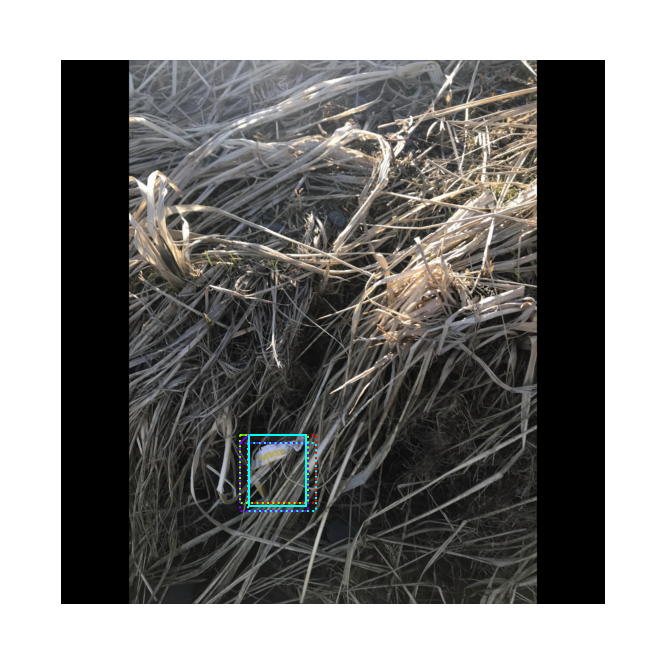

In [65]:
b = 0

# Restore original image (reverse normalization)
sample_image = modellib.unmold_image(normalized_images[b], config)

# Compute anchor shifts.
indices = np.where(rpn_match[b] == 1)[0]
refined_anchors = utils.apply_box_deltas(anchors[indices], rpn_bbox[b, :len(indices)] * config.RPN_BBOX_STD_DEV)
log("anchors", anchors)
log("refined_anchors", refined_anchors)

# Get list of positive anchors
positive_anchor_ids = np.where(rpn_match[b] == 1)[0]
print("Positive anchors: {}".format(len(positive_anchor_ids)))
negative_anchor_ids = np.where(rpn_match[b] == -1)[0]
print("Negative anchors: {}".format(len(negative_anchor_ids)))
neutral_anchor_ids = np.where(rpn_match[b] == 0)[0]
print("Neutral anchors: {}".format(len(neutral_anchor_ids)))

# ROI breakdown by class
for c, n in zip(dataset.class_names, np.bincount(mrcnn_class_ids[b].flatten())):
    if n:
        print("{:23}: {}".format(c[:20], n))

# Show positive anchors
visualize.draw_boxes(sample_image, boxes=anchors[positive_anchor_ids], 
                     refined_boxes=refined_anchors)

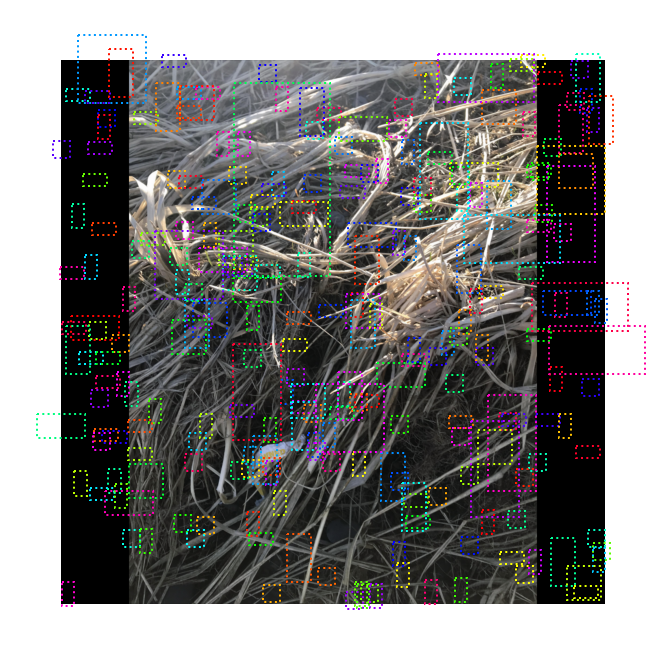

In [67]:
# Show negative anchors
visualize.draw_boxes(sample_image, boxes=anchors[negative_anchor_ids])

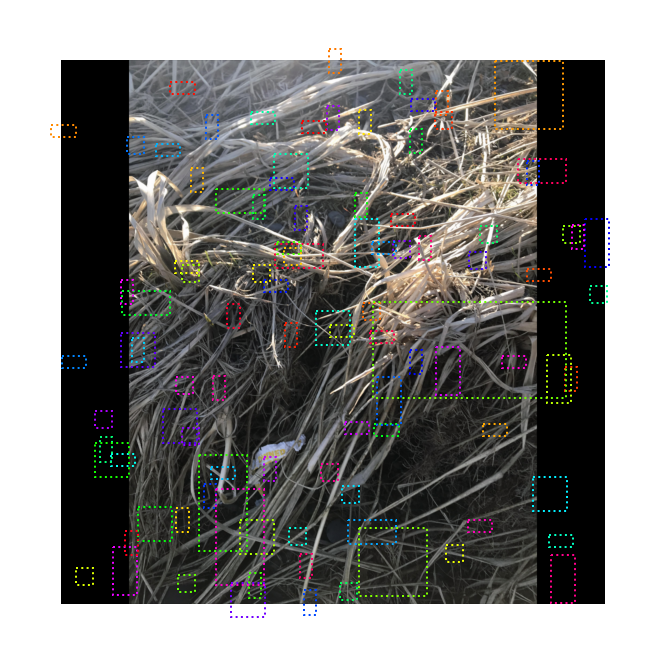

In [68]:
# Show neutral anchors. They don't contribute to training.
visualize.draw_boxes(sample_image, boxes=anchors[np.random.choice(neutral_anchor_ids, 100)])

Positive ROIs:  15
Negative ROIs:  185
Positive Ratio: 0.07
Unique ROIs: 200 out of 200


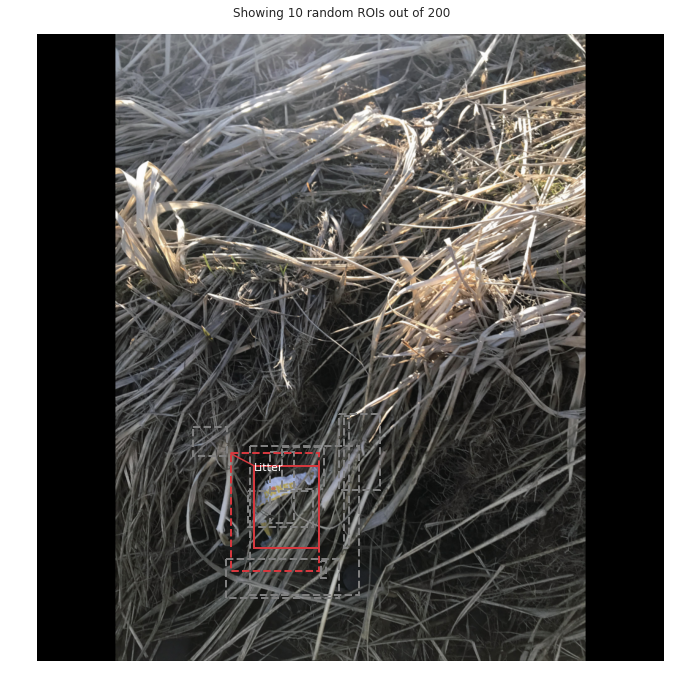

In [69]:
if random_rois:
    # Class aware bboxes
    bbox_specific = mrcnn_bbox[b, np.arange(mrcnn_bbox.shape[1]), mrcnn_class_ids[b], :]

    # Refined ROIs
    refined_rois = utils.apply_box_deltas(rois[b].astype(np.float32), bbox_specific[:,:4] * config.BBOX_STD_DEV)

    # Class aware masks
    mask_specific = mrcnn_mask[b, np.arange(mrcnn_mask.shape[1]), :, :, mrcnn_class_ids[b]]

    visualize.draw_rois(sample_image, rois[b], refined_rois, mask_specific, mrcnn_class_ids[b], dataset.class_names)
    
    # Any repeated ROIs?
    rows = np.ascontiguousarray(rois[b]).view(np.dtype((np.void, rois.dtype.itemsize * rois.shape[-1])))
    _, idx = np.unique(rows, return_index=True)
    print("Unique ROIs: {} out of {}".format(len(idx), rois.shape[1]))

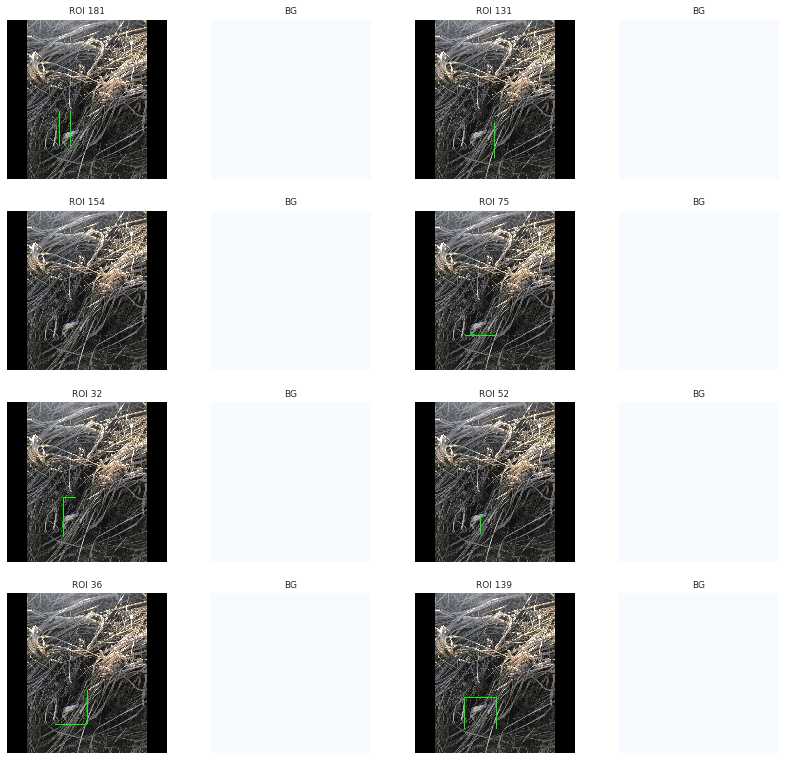

In [70]:
if random_rois:
    # Dispalay ROIs and corresponding masks and bounding boxes
    ids = random.sample(range(rois.shape[1]), 8)

    images = []
    titles = []
    for i in ids:
        image = visualize.draw_box(sample_image.copy(), rois[b,i,:4].astype(np.int32), [255, 0, 0])
        image = visualize.draw_box(image, refined_rois[i].astype(np.int64), [0, 255, 0])
        images.append(image)
        titles.append("ROI {}".format(i))
        images.append(mask_specific[i] * 255)
        titles.append(dataset.class_names[mrcnn_class_ids[b,i]][:20])

    display_images(images, titles, cols=4, cmap="Blues", interpolation="none")

In [71]:
# Check ratio of positive ROIs in a set of images.
if random_rois:
    limit = 10
    temp_g = modellib.data_generator(
        dataset, config, shuffle=True, random_rois=10000, 
        batch_size=1, detection_targets=True)
    total = 0
    for i in range(limit):
        _, [ids, _, _] = next(temp_g)
        positive_rois = np.sum(ids[0] > 0)
        total += positive_rois
        print("{:5} {:5.2f}".format(positive_rois, positive_rois/ids.shape[1]))
    print("Average percent: {:.2f}".format(total/(limit*ids.shape[1])))

   66  0.33
   66  0.33
   66  0.33
   66  0.33
   66  0.33
   66  0.33
   66  0.33
   66  0.33
   66  0.33
   66  0.33
Average percent: 0.33
